FISTA CBPDN Solver
==================

This example demonstrates the use of a FISTA solver for a convolutional sparse coding problem with a greyscale signal [[8]](http://sporco.rtfd.org/en/latest/zreferences.html#chalasani-2013-fast) [[32]](http://sporco.rtfd.org/en/latest/zreferences.html#wohlberg-2016-efficient)

  $$\mathrm{argmin}_\mathbf{x} \; \frac{1}{2} \left\| \sum_m \mathbf{d}_m * \mathbf{x}_{m} - \mathbf{s} \right\|_2^2 + \lambda \sum_m \| \mathbf{x}_{m} \|_1 \;,$$

where $\mathbf{d}_{m}$ is the $m^{\text{th}}$ dictionary filter, $\mathbf{x}_{m}$ is the coefficient map corresponding to the $m^{\text{th}}$ dictionary filter, and $\mathbf{s}$ is the input image.

In [1]:
from __future__ import print_function
from builtins import input
from builtins import range

import pyfftw   # See https://github.com/pyFFTW/pyFFTW/issues/40
import numpy as np

from sporco import util
from sporco import plot
plot.config_notebook_plotting()
import sporco.metric as sm
from sporco.fista import cbpdn

Load example image.

In [2]:
img = util.ExampleImages().image('barbara.png', scaled=True, gray=True,
                                 idxexp=np.s_[10:522, 100:612])

Highpass filter example image.

In [3]:
npd = 16
fltlmbd = 10
sl, sh = util.tikhonov_filter(img, fltlmbd, npd)

Load dictionary and display it.

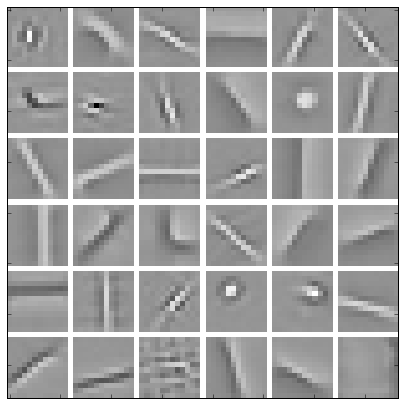

In [4]:
D = util.convdicts()['G:12x12x36']
plot.imview(util.tiledict(D), fgsz=(7, 7))

Set [fista.cbpdn.ConvBPDN](http://sporco.rtfd.org/en/latest/sporco.fista.cbpdn.html#sporco.fista.cbpdn.ConvBPDN) solver options.

In [5]:
lmbda = 5e-2
L = 1e2
opt = cbpdn.ConvBPDN.Options({'Verbose': True, 'MaxMainIter': 250,
            'RelStopTol': 5e-3, 'L': L, 'BackTrack': {'Enabled': True }})

Initialise and run CSC solver.

In [6]:
b = cbpdn.ConvBPDN(D, sh, lmbda, opt, dimK=0)
X = b.solve()
print("ConvBPDN solve time: %.2fs" % b.timer.elapsed('solve'))

Itn   Fnc       DFid      Regℓ1     Rsdl      F         Q         It_Bt     L         
------------------------------------------------------------------------------------


   0  7.55e+02  7.47e+02  1.60e+02  5.08e+01  0.00e+00  0.00e+00  0.00e+00  2.00e+03


   1  7.21e+02  7.06e+02  3.10e+02  4.80e+01  9.28e+07  1.01e+08  1.00e+00  2.00e+03


   2  6.82e+02  6.58e+02  4.89e+02  4.47e+01  8.65e+07  9.34e+07  1.00e+00  2.00e+03


   3  6.41e+02  6.07e+02  6.92e+02  4.11e+01  7.98e+07  8.57e+07  1.00e+00  2.00e+03


   4  6.00e+02  5.55e+02  9.10e+02  3.73e+01  7.29e+07  7.78e+07  1.00e+00  2.00e+03


   5  5.61e+02  5.04e+02  1.14e+03  3.36e+01  6.62e+07  7.03e+07  1.00e+00  2.00e+03


   6  5.24e+02  4.56e+02  1.37e+03  3.00e+01  5.99e+07  6.31e+07  1.00e+00  2.00e+03


   7  4.91e+02  4.11e+02  1.59e+03  2.66e+01  5.40e+07  5.66e+07  1.00e+00  2.00e+03


   8  4.61e+02  3.70e+02  1.81e+03  2.36e+01  4.86e+07  5.07e+07  1.00e+00  2.00e+03


   9  4.35e+02  3.33e+02  2.03e+03  2.10e+01  4.38e+07  4.54e+07  1.00e+00  2.00e+03


  10  4.12e+02  3.01e+02  2.22e+03  1.87e+01  3.95e+07  4.08e+07  1.00e+00  2.00e+03


  11  3.92e+02  2.71e+02  2.40e+03  1.69e+01  3.56e+07  3.67e+07  1.00e+00  2.00e+03


  12  3.74e+02  2.45e+02  2.57e+03  1.54e+01  3.22e+07  3.31e+07  1.00e+00  2.00e+03


  13  3.59e+02  2.22e+02  2.72e+03  1.41e+01  2.92e+07  2.99e+07  1.00e+00  2.00e+03


  14  3.45e+02  2.02e+02  2.86e+03  1.31e+01  2.65e+07  2.71e+07  1.00e+00  2.00e+03


  15  3.33e+02  1.84e+02  2.98e+03  1.22e+01  2.41e+07  2.46e+07  1.00e+00  2.00e+03


  16  3.22e+02  1.68e+02  3.08e+03  1.14e+01  2.20e+07  2.24e+07  1.00e+00  2.00e+03


  17  3.12e+02  1.53e+02  3.17e+03  1.07e+01  2.01e+07  2.04e+07  1.00e+00  2.00e+03


  18  3.03e+02  1.40e+02  3.25e+03  1.01e+01  1.84e+07  1.87e+07  1.00e+00  2.00e+03


  19  2.95e+02  1.29e+02  3.32e+03  9.56e+00  1.69e+07  1.71e+07  1.00e+00  2.00e+03


  20  2.88e+02  1.19e+02  3.38e+03  9.06e+00  1.56e+07  1.58e+07  1.00e+00  2.00e+03


  21  2.81e+02  1.10e+02  3.43e+03  8.63e+00  1.44e+07  1.46e+07  1.00e+00  2.00e+03


  22  2.75e+02  1.02e+02  3.47e+03  8.24e+00  1.34e+07  1.35e+07  1.00e+00  2.00e+03


  23  2.70e+02  9.49e+01  3.51e+03  7.91e+00  1.25e+07  1.26e+07  1.00e+00  2.00e+03


  24  2.66e+02  8.88e+01  3.53e+03  7.63e+00  1.17e+07  1.18e+07  1.00e+00  2.00e+03


  25  2.61e+02  8.34e+01  3.56e+03  7.38e+00  1.10e+07  1.10e+07  1.00e+00  2.00e+03


  26  2.57e+02  7.86e+01  3.58e+03  7.16e+00  1.03e+07  1.04e+07  1.00e+00  2.00e+03


  27  2.54e+02  7.43e+01  3.59e+03  6.97e+00  9.77e+06  9.85e+06  1.00e+00  2.00e+03


  28  2.51e+02  7.05e+01  3.60e+03  6.78e+00  9.28e+06  9.34e+06  1.00e+00  2.00e+03


  29  2.48e+02  6.72e+01  3.61e+03  6.62e+00  8.83e+06  8.90e+06  1.00e+00  2.00e+03


  30  2.45e+02  6.42e+01  3.62e+03  6.46e+00  8.44e+06  8.50e+06  1.00e+00  2.00e+03


  31  2.42e+02  6.15e+01  3.62e+03  6.32e+00  8.09e+06  8.14e+06  1.00e+00  2.00e+03


  32  2.40e+02  5.91e+01  3.62e+03  6.18e+00  7.77e+06  7.82e+06  1.00e+00  2.00e+03


  33  2.38e+02  5.69e+01  3.62e+03  6.04e+00  7.49e+06  7.53e+06  1.00e+00  2.00e+03


  34  2.36e+02  5.50e+01  3.62e+03  5.91e+00  7.23e+06  7.27e+06  1.00e+00  2.00e+03


  35  2.34e+02  5.32e+01  3.62e+03  5.79e+00  7.00e+06  7.04e+06  1.00e+00  2.00e+03


  36  2.32e+02  5.16e+01  3.61e+03  5.68e+00  6.79e+06  6.83e+06  1.00e+00  2.00e+03


  37  2.30e+02  5.02e+01  3.61e+03  5.58e+00  6.60e+06  6.64e+06  1.00e+00  2.00e+03


  38  2.29e+02  4.89e+01  3.60e+03  5.48e+00  6.43e+06  6.47e+06  1.00e+00  2.00e+03


  39  2.27e+02  4.77e+01  3.59e+03  5.38e+00  6.28e+06  6.31e+06  1.00e+00  2.00e+03


  40  2.26e+02  4.66e+01  3.58e+03  5.28e+00  6.14e+06  6.17e+06  1.00e+00  2.00e+03


  41  2.24e+02  4.57e+01  3.58e+03  5.19e+00  6.01e+06  6.04e+06  1.00e+00  2.00e+03


  42  2.23e+02  4.48e+01  3.57e+03  5.11e+00  5.90e+06  5.93e+06  1.00e+00  2.00e+03


  43  2.22e+02  4.40e+01  3.56e+03  5.02e+00  5.80e+06  5.82e+06  1.00e+00  2.00e+03


  44  2.21e+02  4.33e+01  3.55e+03  4.95e+00  5.70e+06  5.73e+06  1.00e+00  2.00e+03


  45  2.19e+02  4.27e+01  3.54e+03  4.88e+00  5.62e+06  5.65e+06  1.00e+00  2.00e+03


  46  2.18e+02  4.21e+01  3.52e+03  4.82e+00  5.54e+06  5.57e+06  1.00e+00  2.00e+03


  47  2.17e+02  4.16e+01  3.51e+03  4.74e+00  5.47e+06  5.50e+06  1.00e+00  2.00e+03


  48  2.16e+02  4.11e+01  3.50e+03  4.68e+00  5.41e+06  5.43e+06  1.00e+00  2.00e+03


  49  2.15e+02  4.06e+01  3.49e+03  4.61e+00  5.35e+06  5.37e+06  1.00e+00  2.00e+03


  50  2.14e+02  4.02e+01  3.48e+03  4.54e+00  5.30e+06  5.32e+06  1.00e+00  2.00e+03


  51  2.13e+02  3.99e+01  3.47e+03  4.48e+00  5.25e+06  5.27e+06  1.00e+00  2.00e+03


  52  2.12e+02  3.95e+01  3.46e+03  4.42e+00  5.20e+06  5.22e+06  1.00e+00  2.00e+03


  53  2.11e+02  3.92e+01  3.44e+03  4.35e+00  5.16e+06  5.18e+06  1.00e+00  2.00e+03


  54  2.11e+02  3.89e+01  3.43e+03  4.30e+00  5.12e+06  5.14e+06  1.00e+00  2.00e+03


  55  2.10e+02  3.86e+01  3.42e+03  4.23e+00  5.09e+06  5.11e+06  1.00e+00  2.00e+03


  56  2.09e+02  3.84e+01  3.41e+03  4.17e+00  5.05e+06  5.07e+06  1.00e+00  2.00e+03


  57  2.08e+02  3.81e+01  3.40e+03  4.12e+00  5.02e+06  5.04e+06  1.00e+00  2.00e+03


  58  2.07e+02  3.79e+01  3.39e+03  4.06e+00  4.99e+06  5.01e+06  1.00e+00  2.00e+03


  59  2.07e+02  3.77e+01  3.38e+03  4.01e+00  4.96e+06  4.98e+06  1.00e+00  2.00e+03


  60  2.06e+02  3.74e+01  3.37e+03  3.95e+00  4.93e+06  4.95e+06  1.00e+00  2.00e+03


  61  2.05e+02  3.72e+01  3.36e+03  3.90e+00  4.90e+06  4.92e+06  1.00e+00  2.00e+03


  62  2.04e+02  3.70e+01  3.35e+03  3.86e+00  4.88e+06  4.90e+06  1.00e+00  2.00e+03


  63  2.04e+02  3.69e+01  3.34e+03  3.80e+00  4.85e+06  4.87e+06  1.00e+00  2.00e+03


  64  2.03e+02  3.67e+01  3.33e+03  3.76e+00  4.83e+06  4.85e+06  1.00e+00  2.00e+03


  65  2.03e+02  3.65e+01  3.32e+03  3.70e+00  4.81e+06  4.82e+06  1.00e+00  2.00e+03


  66  2.02e+02  3.63e+01  3.31e+03  3.66e+00  4.78e+06  4.80e+06  1.00e+00  2.00e+03


  67  2.01e+02  3.62e+01  3.30e+03  3.61e+00  4.76e+06  4.78e+06  1.00e+00  2.00e+03


  68  2.01e+02  3.60e+01  3.29e+03  3.57e+00  4.74e+06  4.75e+06  1.00e+00  2.00e+03


  69  2.00e+02  3.58e+01  3.29e+03  3.52e+00  4.72e+06  4.73e+06  1.00e+00  2.00e+03


  70  2.00e+02  3.57e+01  3.28e+03  3.49e+00  4.70e+06  4.71e+06  1.00e+00  2.00e+03


  71  1.99e+02  3.55e+01  3.27e+03  3.45e+00  4.68e+06  4.69e+06  1.00e+00  2.00e+03


  72  1.99e+02  3.54e+01  3.26e+03  3.40e+00  4.66e+06  4.67e+06  1.00e+00  2.00e+03


  73  1.98e+02  3.52e+01  3.26e+03  3.36e+00  4.64e+06  4.65e+06  1.00e+00  2.00e+03


  74  1.97e+02  3.51e+01  3.25e+03  3.32e+00  4.62e+06  4.63e+06  1.00e+00  2.00e+03


  75  1.97e+02  3.49e+01  3.24e+03  3.28e+00  4.60e+06  4.62e+06  1.00e+00  2.00e+03


  76  1.97e+02  3.48e+01  3.23e+03  3.25e+00  4.59e+06  4.60e+06  1.00e+00  2.00e+03


  77  1.96e+02  3.47e+01  3.23e+03  3.22e+00  4.57e+06  4.58e+06  1.00e+00  2.00e+03


  78  1.96e+02  3.46e+01  3.22e+03  3.18e+00  4.55e+06  4.56e+06  1.00e+00  2.00e+03


  79  1.95e+02  3.44e+01  3.21e+03  3.16e+00  4.53e+06  4.55e+06  1.00e+00  2.00e+03


  80  1.95e+02  3.43e+01  3.21e+03  3.12e+00  4.52e+06  4.53e+06  1.00e+00  2.00e+03


  81  1.94e+02  3.42e+01  3.20e+03  3.09e+00  4.50e+06  4.51e+06  1.00e+00  2.00e+03


  82  1.94e+02  3.41e+01  3.20e+03  3.05e+00  4.49e+06  4.50e+06  1.00e+00  2.00e+03


  83  1.93e+02  3.40e+01  3.19e+03  3.02e+00  4.47e+06  4.48e+06  1.00e+00  2.00e+03


  84  1.93e+02  3.39e+01  3.18e+03  2.99e+00  4.46e+06  4.47e+06  1.00e+00  2.00e+03


  85  1.93e+02  3.38e+01  3.18e+03  2.96e+00  4.45e+06  4.46e+06  1.00e+00  2.00e+03


  86  1.92e+02  3.37e+01  3.17e+03  2.92e+00  4.43e+06  4.44e+06  1.00e+00  2.00e+03


  87  1.92e+02  3.36e+01  3.17e+03  2.90e+00  4.42e+06  4.43e+06  1.00e+00  2.00e+03


  88  1.92e+02  3.35e+01  3.16e+03  2.87e+00  4.41e+06  4.42e+06  1.00e+00  2.00e+03


  89  1.91e+02  3.34e+01  3.16e+03  2.84e+00  4.40e+06  4.41e+06  1.00e+00  2.00e+03


  90  1.91e+02  3.33e+01  3.15e+03  2.82e+00  4.39e+06  4.39e+06  1.00e+00  2.00e+03


  91  1.90e+02  3.32e+01  3.14e+03  2.79e+00  4.38e+06  4.38e+06  1.00e+00  2.00e+03


  92  1.90e+02  3.31e+01  3.14e+03  2.76e+00  4.37e+06  4.37e+06  1.00e+00  2.00e+03


  93  1.90e+02  3.31e+01  3.13e+03  2.73e+00  4.36e+06  4.36e+06  1.00e+00  2.00e+03


  94  1.89e+02  3.30e+01  3.13e+03  2.71e+00  4.35e+06  4.35e+06  1.00e+00  2.00e+03


  95  1.89e+02  3.29e+01  3.12e+03  2.69e+00  4.34e+06  4.34e+06  1.00e+00  2.00e+03


  96  1.89e+02  3.29e+01  3.12e+03  2.67e+00  4.33e+06  4.34e+06  1.00e+00  2.00e+03


  97  1.89e+02  3.28e+01  3.11e+03  2.64e+00  4.32e+06  4.33e+06  1.00e+00  2.00e+03


  98  1.88e+02  3.27e+01  3.11e+03  2.61e+00  4.31e+06  4.32e+06  1.00e+00  2.00e+03


  99  1.88e+02  3.27e+01  3.11e+03  2.60e+00  4.30e+06  4.31e+06  1.00e+00  2.00e+03


 100  1.88e+02  3.26e+01  3.10e+03  2.57e+00  4.30e+06  4.30e+06  1.00e+00  2.00e+03


 101  1.87e+02  3.26e+01  3.10e+03  2.54e+00  4.29e+06  4.30e+06  1.00e+00  2.00e+03


 102  1.87e+02  3.25e+01  3.09e+03  2.52e+00  4.28e+06  4.29e+06  1.00e+00  2.00e+03


 103  1.87e+02  3.24e+01  3.09e+03  2.50e+00  4.28e+06  4.28e+06  1.00e+00  2.00e+03


 104  1.87e+02  3.24e+01  3.08e+03  2.48e+00  4.27e+06  4.27e+06  1.00e+00  2.00e+03


 105  1.86e+02  3.23e+01  3.08e+03  2.45e+00  4.26e+06  4.27e+06  1.00e+00  2.00e+03


 106  1.86e+02  3.23e+01  3.08e+03  2.43e+00  4.26e+06  4.26e+06  1.00e+00  2.00e+03


 107  1.86e+02  3.23e+01  3.07e+03  2.41e+00  4.25e+06  4.26e+06  1.00e+00  2.00e+03


 108  1.86e+02  3.22e+01  3.07e+03  2.39e+00  4.24e+06  4.25e+06  1.00e+00  2.00e+03


 109  1.85e+02  3.22e+01  3.06e+03  2.37e+00  4.24e+06  4.24e+06  1.00e+00  2.00e+03


 110  1.85e+02  3.21e+01  3.06e+03  2.35e+00  4.23e+06  4.24e+06  1.00e+00  2.00e+03


 111  1.85e+02  3.21e+01  3.06e+03  2.32e+00  4.23e+06  4.23e+06  1.00e+00  2.00e+03


 112  1.85e+02  3.20e+01  3.05e+03  2.30e+00  4.22e+06  4.23e+06  1.00e+00  2.00e+03


 113  1.84e+02  3.20e+01  3.05e+03  2.28e+00  4.22e+06  4.22e+06  1.00e+00  2.00e+03


 114  1.84e+02  3.19e+01  3.04e+03  2.27e+00  4.21e+06  4.22e+06  1.00e+00  2.00e+03


 115  1.84e+02  3.19e+01  3.04e+03  2.25e+00  4.20e+06  4.21e+06  1.00e+00  2.00e+03


 116  1.84e+02  3.19e+01  3.04e+03  2.23e+00  4.20e+06  4.20e+06  1.00e+00  2.00e+03


 117  1.84e+02  3.18e+01  3.03e+03  2.21e+00  4.19e+06  4.20e+06  1.00e+00  2.00e+03


 118  1.83e+02  3.18e+01  3.03e+03  2.19e+00  4.19e+06  4.19e+06  1.00e+00  2.00e+03


 119  1.83e+02  3.18e+01  3.03e+03  2.18e+00  4.18e+06  4.19e+06  1.00e+00  2.00e+03


 120  1.83e+02  3.17e+01  3.02e+03  2.16e+00  4.18e+06  4.18e+06  1.00e+00  2.00e+03


 121  1.83e+02  3.17e+01  3.02e+03  2.14e+00  4.18e+06  4.18e+06  1.00e+00  2.00e+03


 122  1.83e+02  3.17e+01  3.02e+03  2.12e+00  4.17e+06  4.18e+06  1.00e+00  2.00e+03


 123  1.82e+02  3.16e+01  3.02e+03  2.09e+00  4.17e+06  4.17e+06  1.00e+00  2.00e+03


 124  1.82e+02  3.16e+01  3.01e+03  2.07e+00  4.16e+06  4.17e+06  1.00e+00  2.00e+03


 125  1.82e+02  3.15e+01  3.01e+03  2.05e+00  4.16e+06  4.16e+06  1.00e+00  2.00e+03


 126  1.82e+02  3.15e+01  3.01e+03  2.03e+00  4.15e+06  4.16e+06  1.00e+00  2.00e+03


 127  1.82e+02  3.15e+01  3.00e+03  2.02e+00  4.15e+06  4.15e+06  1.00e+00  2.00e+03


 128  1.82e+02  3.15e+01  3.00e+03  2.01e+00  4.14e+06  4.15e+06  1.00e+00  2.00e+03


 129  1.81e+02  3.14e+01  3.00e+03  2.00e+00  4.14e+06  4.15e+06  1.00e+00  2.00e+03


 130  1.81e+02  3.14e+01  3.00e+03  1.99e+00  4.14e+06  4.14e+06  1.00e+00  2.00e+03


 131  1.81e+02  3.14e+01  2.99e+03  1.97e+00  4.13e+06  4.14e+06  1.00e+00  2.00e+03


 132  1.81e+02  3.13e+01  2.99e+03  1.96e+00  4.13e+06  4.13e+06  1.00e+00  2.00e+03


 133  1.81e+02  3.13e+01  2.99e+03  1.93e+00  4.12e+06  4.13e+06  1.00e+00  2.00e+03


 134  1.81e+02  3.13e+01  2.99e+03  1.92e+00  4.12e+06  4.12e+06  1.00e+00  2.00e+03


 135  1.80e+02  3.12e+01  2.98e+03  1.90e+00  4.12e+06  4.12e+06  1.00e+00  2.00e+03


 136  1.80e+02  3.12e+01  2.98e+03  1.89e+00  4.11e+06  4.12e+06  1.00e+00  2.00e+03


 137  1.80e+02  3.12e+01  2.98e+03  1.87e+00  4.11e+06  4.11e+06  1.00e+00  2.00e+03


 138  1.80e+02  3.12e+01  2.98e+03  1.86e+00  4.11e+06  4.11e+06  1.00e+00  2.00e+03


 139  1.80e+02  3.11e+01  2.97e+03  1.84e+00  4.10e+06  4.11e+06  1.00e+00  2.00e+03


 140  1.80e+02  3.11e+01  2.97e+03  1.82e+00  4.10e+06  4.10e+06  1.00e+00  2.00e+03


 141  1.80e+02  3.11e+01  2.97e+03  1.80e+00  4.09e+06  4.10e+06  1.00e+00  2.00e+03


 142  1.79e+02  3.10e+01  2.97e+03  1.79e+00  4.09e+06  4.09e+06  1.00e+00  2.00e+03


 143  1.79e+02  3.10e+01  2.97e+03  1.78e+00  4.09e+06  4.09e+06  1.00e+00  2.00e+03


 144  1.79e+02  3.10e+01  2.96e+03  1.76e+00  4.08e+06  4.09e+06  1.00e+00  2.00e+03


 145  1.79e+02  3.10e+01  2.96e+03  1.75e+00  4.08e+06  4.08e+06  1.00e+00  2.00e+03


 146  1.79e+02  3.09e+01  2.96e+03  1.74e+00  4.08e+06  4.08e+06  1.00e+00  2.00e+03


 147  1.79e+02  3.09e+01  2.96e+03  1.73e+00  4.07e+06  4.08e+06  1.00e+00  2.00e+03


 148  1.79e+02  3.09e+01  2.95e+03  1.71e+00  4.07e+06  4.07e+06  1.00e+00  2.00e+03


 149  1.79e+02  3.09e+01  2.95e+03  1.70e+00  4.07e+06  4.07e+06  1.00e+00  2.00e+03


 150  1.78e+02  3.08e+01  2.95e+03  1.68e+00  4.07e+06  4.07e+06  1.00e+00  2.00e+03


 151  1.78e+02  3.08e+01  2.95e+03  1.67e+00  4.06e+06  4.07e+06  1.00e+00  2.00e+03


 152  1.78e+02  3.08e+01  2.95e+03  1.66e+00  4.06e+06  4.06e+06  1.00e+00  2.00e+03


 153  1.78e+02  3.08e+01  2.95e+03  1.65e+00  4.06e+06  4.06e+06  1.00e+00  2.00e+03


 154  1.78e+02  3.08e+01  2.94e+03  1.64e+00  4.05e+06  4.06e+06  1.00e+00  2.00e+03


 155  1.78e+02  3.07e+01  2.94e+03  1.63e+00  4.05e+06  4.05e+06  1.00e+00  2.00e+03


 156  1.78e+02  3.07e+01  2.94e+03  1.61e+00  4.05e+06  4.05e+06  1.00e+00  2.00e+03


 157  1.78e+02  3.07e+01  2.94e+03  1.60e+00  4.05e+06  4.05e+06  1.00e+00  2.00e+03


 158  1.78e+02  3.07e+01  2.94e+03  1.60e+00  4.04e+06  4.05e+06  1.00e+00  2.00e+03


 159  1.77e+02  3.07e+01  2.94e+03  1.58e+00  4.04e+06  4.04e+06  1.00e+00  2.00e+03


 160  1.77e+02  3.06e+01  2.93e+03  1.57e+00  4.04e+06  4.04e+06  1.00e+00  2.00e+03


 161  1.77e+02  3.06e+01  2.93e+03  1.55e+00  4.03e+06  4.04e+06  1.00e+00  2.00e+03


 162  1.77e+02  3.06e+01  2.93e+03  1.53e+00  4.03e+06  4.03e+06  1.00e+00  2.00e+03


 163  1.77e+02  3.06e+01  2.93e+03  1.53e+00  4.03e+06  4.03e+06  1.00e+00  2.00e+03


 164  1.77e+02  3.06e+01  2.93e+03  1.53e+00  4.03e+06  4.03e+06  1.00e+00  2.00e+03


 165  1.77e+02  3.05e+01  2.93e+03  1.51e+00  4.02e+06  4.03e+06  1.00e+00  2.00e+03


 166  1.77e+02  3.05e+01  2.92e+03  1.51e+00  4.02e+06  4.02e+06  1.00e+00  2.00e+03


 167  1.77e+02  3.05e+01  2.92e+03  1.51e+00  4.02e+06  4.02e+06  1.00e+00  2.00e+03


 168  1.77e+02  3.05e+01  2.92e+03  1.49e+00  4.02e+06  4.02e+06  1.00e+00  2.00e+03


 169  1.76e+02  3.05e+01  2.92e+03  1.48e+00  4.01e+06  4.02e+06  1.00e+00  2.00e+03


 170  1.76e+02  3.04e+01  2.92e+03  1.47e+00  4.01e+06  4.01e+06  1.00e+00  2.00e+03


 171  1.76e+02  3.04e+01  2.92e+03  1.46e+00  4.01e+06  4.01e+06  1.00e+00  2.00e+03


 172  1.76e+02  3.04e+01  2.92e+03  1.45e+00  4.01e+06  4.01e+06  1.00e+00  2.00e+03


 173  1.76e+02  3.04e+01  2.91e+03  1.43e+00  4.00e+06  4.01e+06  1.00e+00  2.00e+03


 174  1.76e+02  3.04e+01  2.91e+03  1.41e+00  4.00e+06  4.00e+06  1.00e+00  2.00e+03


 175  1.76e+02  3.03e+01  2.91e+03  1.41e+00  4.00e+06  4.00e+06  1.00e+00  2.00e+03


 176  1.76e+02  3.03e+01  2.91e+03  1.39e+00  4.00e+06  4.00e+06  1.00e+00  2.00e+03


 177  1.76e+02  3.03e+01  2.91e+03  1.38e+00  3.99e+06  4.00e+06  1.00e+00  2.00e+03


 178  1.76e+02  3.03e+01  2.91e+03  1.38e+00  3.99e+06  3.99e+06  1.00e+00  2.00e+03


 179  1.76e+02  3.03e+01  2.91e+03  1.37e+00  3.99e+06  3.99e+06  1.00e+00  2.00e+03


 180  1.76e+02  3.03e+01  2.91e+03  1.36e+00  3.99e+06  3.99e+06  1.00e+00  2.00e+03


 181  1.75e+02  3.02e+01  2.90e+03  1.36e+00  3.99e+06  3.99e+06  1.00e+00  2.00e+03


 182  1.75e+02  3.02e+01  2.90e+03  1.34e+00  3.98e+06  3.99e+06  1.00e+00  2.00e+03


 183  1.75e+02  3.02e+01  2.90e+03  1.33e+00  3.98e+06  3.98e+06  1.00e+00  2.00e+03


 184  1.75e+02  3.02e+01  2.90e+03  1.33e+00  3.98e+06  3.98e+06  1.00e+00  2.00e+03


 185  1.75e+02  3.02e+01  2.90e+03  1.31e+00  3.98e+06  3.98e+06  1.00e+00  2.00e+03


 186  1.75e+02  3.02e+01  2.90e+03  1.30e+00  3.98e+06  3.98e+06  1.00e+00  2.00e+03


 187  1.75e+02  3.02e+01  2.90e+03  1.29e+00  3.98e+06  3.98e+06  1.00e+00  2.00e+03


 188  1.75e+02  3.01e+01  2.90e+03  1.29e+00  3.97e+06  3.98e+06  1.00e+00  2.00e+03


 189  1.75e+02  3.01e+01  2.89e+03  1.28e+00  3.97e+06  3.97e+06  1.00e+00  2.00e+03


 190  1.75e+02  3.01e+01  2.89e+03  1.27e+00  3.97e+06  3.97e+06  1.00e+00  2.00e+03


 191  1.75e+02  3.01e+01  2.89e+03  1.27e+00  3.97e+06  3.97e+06  1.00e+00  2.00e+03


 192  1.75e+02  3.01e+01  2.89e+03  1.26e+00  3.97e+06  3.97e+06  1.00e+00  2.00e+03


 193  1.75e+02  3.01e+01  2.89e+03  1.25e+00  3.97e+06  3.97e+06  1.00e+00  2.00e+03


 194  1.75e+02  3.01e+01  2.89e+03  1.24e+00  3.97e+06  3.97e+06  1.00e+00  2.00e+03


 195  1.74e+02  3.01e+01  2.89e+03  1.23e+00  3.96e+06  3.97e+06  1.00e+00  2.00e+03


 196  1.74e+02  3.01e+01  2.89e+03  1.22e+00  3.96e+06  3.96e+06  1.00e+00  2.00e+03


 197  1.74e+02  3.01e+01  2.89e+03  1.21e+00  3.96e+06  3.96e+06  1.00e+00  2.00e+03


 198  1.74e+02  3.01e+01  2.88e+03  1.21e+00  3.96e+06  3.96e+06  1.00e+00  2.00e+03


 199  1.74e+02  3.00e+01  2.88e+03  1.21e+00  3.96e+06  3.96e+06  1.00e+00  2.00e+03


 200  1.74e+02  3.00e+01  2.88e+03  1.21e+00  3.96e+06  3.96e+06  1.00e+00  2.00e+03


 201  1.74e+02  3.00e+01  2.88e+03  1.20e+00  3.96e+06  3.96e+06  1.00e+00  2.00e+03


 202  1.74e+02  3.00e+01  2.88e+03  1.18e+00  3.96e+06  3.96e+06  1.00e+00  2.00e+03


 203  1.74e+02  3.00e+01  2.88e+03  1.18e+00  3.96e+06  3.96e+06  1.00e+00  2.00e+03


 204  1.74e+02  3.00e+01  2.88e+03  1.18e+00  3.95e+06  3.96e+06  1.00e+00  2.00e+03


 205  1.74e+02  3.00e+01  2.88e+03  1.16e+00  3.95e+06  3.95e+06  1.00e+00  2.00e+03


 206  1.74e+02  3.00e+01  2.88e+03  1.15e+00  3.95e+06  3.95e+06  1.00e+00  2.00e+03


 207  1.74e+02  3.00e+01  2.88e+03  1.15e+00  3.95e+06  3.95e+06  1.00e+00  2.00e+03


 208  1.74e+02  3.00e+01  2.87e+03  1.14e+00  3.95e+06  3.95e+06  1.00e+00  2.00e+03


 209  1.74e+02  3.00e+01  2.87e+03  1.14e+00  3.95e+06  3.95e+06  1.00e+00  2.00e+03


 210  1.74e+02  2.99e+01  2.87e+03  1.12e+00  3.95e+06  3.95e+06  1.00e+00  2.00e+03


 211  1.74e+02  2.99e+01  2.87e+03  1.12e+00  3.95e+06  3.95e+06  1.00e+00  2.00e+03


 212  1.73e+02  2.99e+01  2.87e+03  1.11e+00  3.94e+06  3.95e+06  1.00e+00  2.00e+03


 213  1.73e+02  2.99e+01  2.87e+03  1.12e+00  3.94e+06  3.94e+06  1.00e+00  2.00e+03


 214  1.73e+02  2.99e+01  2.87e+03  1.11e+00  3.94e+06  3.94e+06  1.00e+00  2.00e+03


 215  1.73e+02  2.99e+01  2.87e+03  1.10e+00  3.94e+06  3.94e+06  1.00e+00  2.00e+03


 216  1.73e+02  2.99e+01  2.87e+03  1.09e+00  3.94e+06  3.94e+06  1.00e+00  2.00e+03


 217  1.73e+02  2.99e+01  2.87e+03  1.08e+00  3.94e+06  3.94e+06  1.00e+00  2.00e+03


 218  1.73e+02  2.99e+01  2.87e+03  1.07e+00  3.94e+06  3.94e+06  1.00e+00  2.00e+03


 219  1.73e+02  2.99e+01  2.87e+03  1.07e+00  3.94e+06  3.94e+06  1.00e+00  2.00e+03


 220  1.73e+02  2.99e+01  2.86e+03  1.06e+00  3.93e+06  3.94e+06  1.00e+00  2.00e+03


 221  1.73e+02  2.98e+01  2.86e+03  1.06e+00  3.93e+06  3.93e+06  1.00e+00  2.00e+03


 222  1.73e+02  2.98e+01  2.86e+03  1.05e+00  3.93e+06  3.93e+06  1.00e+00  2.00e+03


 223  1.73e+02  2.98e+01  2.86e+03  1.04e+00  3.93e+06  3.93e+06  1.00e+00  2.00e+03


 224  1.73e+02  2.98e+01  2.86e+03  1.03e+00  3.93e+06  3.93e+06  1.00e+00  2.00e+03


 225  1.73e+02  2.98e+01  2.86e+03  1.03e+00  3.93e+06  3.93e+06  1.00e+00  2.00e+03


 226  1.73e+02  2.98e+01  2.86e+03  1.03e+00  3.93e+06  3.93e+06  1.00e+00  2.00e+03


 227  1.73e+02  2.98e+01  2.86e+03  1.02e+00  3.93e+06  3.93e+06  1.00e+00  2.00e+03


 228  1.73e+02  2.98e+01  2.86e+03  1.02e+00  3.93e+06  3.93e+06  1.00e+00  2.00e+03


 229  1.73e+02  2.98e+01  2.86e+03  1.02e+00  3.93e+06  3.93e+06  1.00e+00  2.00e+03


 230  1.73e+02  2.98e+01  2.86e+03  1.01e+00  3.92e+06  3.93e+06  1.00e+00  2.00e+03


 231  1.73e+02  2.98e+01  2.86e+03  1.01e+00  3.92e+06  3.92e+06  1.00e+00  2.00e+03


 232  1.73e+02  2.98e+01  2.86e+03  1.01e+00  3.92e+06  3.92e+06  1.00e+00  2.00e+03


 233  1.73e+02  2.98e+01  2.85e+03  1.00e+00  3.92e+06  3.92e+06  1.00e+00  2.00e+03


 234  1.72e+02  2.98e+01  2.85e+03  9.96e-01  3.92e+06  3.92e+06  1.00e+00  2.00e+03


 235  1.72e+02  2.97e+01  2.85e+03  9.79e-01  3.92e+06  3.92e+06  1.00e+00  2.00e+03


 236  1.72e+02  2.97e+01  2.85e+03  9.72e-01  3.92e+06  3.92e+06  1.00e+00  2.00e+03


 237  1.72e+02  2.97e+01  2.85e+03  9.65e-01  3.92e+06  3.92e+06  1.00e+00  2.00e+03


 238  1.72e+02  2.97e+01  2.85e+03  9.59e-01  3.92e+06  3.92e+06  1.00e+00  2.00e+03


 239  1.72e+02  2.97e+01  2.85e+03  9.48e-01  3.92e+06  3.92e+06  1.00e+00  2.00e+03


 240  1.72e+02  2.97e+01  2.85e+03  9.46e-01  3.92e+06  3.92e+06  1.00e+00  2.00e+03


 241  1.72e+02  2.97e+01  2.85e+03  9.44e-01  3.92e+06  3.92e+06  1.00e+00  2.00e+03


 242  1.72e+02  2.97e+01  2.85e+03  9.34e-01  3.92e+06  3.92e+06  1.00e+00  2.00e+03


 243  1.72e+02  2.97e+01  2.85e+03  9.36e-01  3.92e+06  3.92e+06  1.00e+00  2.00e+03


 244  1.72e+02  2.97e+01  2.85e+03  9.34e-01  3.91e+06  3.92e+06  1.00e+00  2.00e+03


 245  1.72e+02  2.97e+01  2.85e+03  9.41e-01  3.91e+06  3.92e+06  1.00e+00  2.00e+03


 246  1.72e+02  2.97e+01  2.85e+03  9.38e-01  3.91e+06  3.91e+06  1.00e+00  2.00e+03


 247  1.72e+02  2.97e+01  2.85e+03  9.36e-01  3.91e+06  3.91e+06  1.00e+00  2.00e+03


 248  1.72e+02  2.97e+01  2.84e+03  9.26e-01  3.91e+06  3.91e+06  1.00e+00  2.00e+03


 249  1.72e+02  2.97e+01  2.84e+03  9.18e-01  3.91e+06  3.91e+06  1.00e+00  2.00e+03
------------------------------------------------------------------------------------
ConvBPDN solve time: 130.97s


Reconstruct image from sparse representation.

In [7]:
shr = b.reconstruct().squeeze()
imgr = sl + shr
print("Reconstruction PSNR: %.2fdB\n" % sm.psnr(img, imgr))

Reconstruction PSNR: 35.57dB



Display low pass component and sum of absolute values of coefficient maps of highpass component.

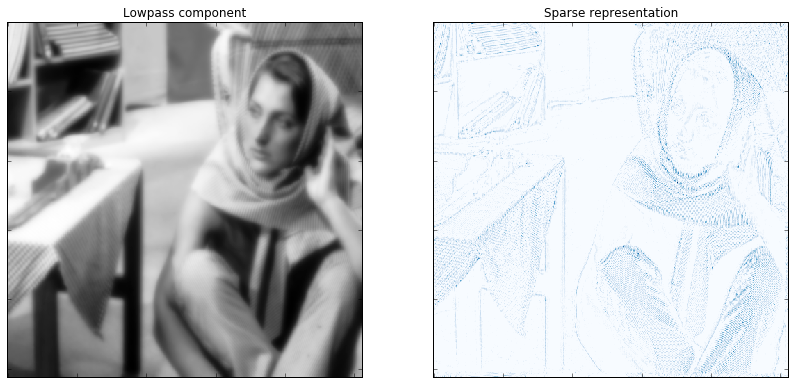

In [8]:
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(sl, title='Lowpass component', fgrf=fig)
plot.subplot(1, 2, 2)
plot.imview(np.sum(abs(X), axis=b.cri.axisM).squeeze(), cmap=plot.cm.Blues,
            title='Sparse representation', fgrf=fig)
fig.show()

Display original and reconstructed images.

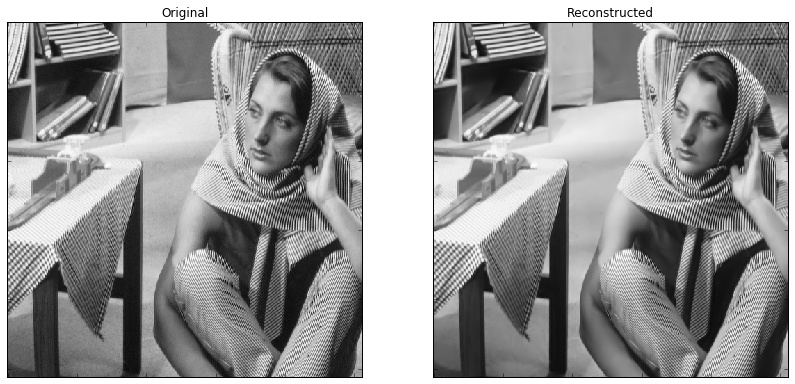

In [9]:
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(img, title='Original', fgrf=fig)
plot.subplot(1, 2, 2)
plot.imview(imgr, title='Reconstructed', fgrf=fig)
fig.show()

Get iterations statistics from solver object and plot functional value, ADMM primary and dual residuals, and automatically adjusted ADMM penalty parameter against the iteration number.

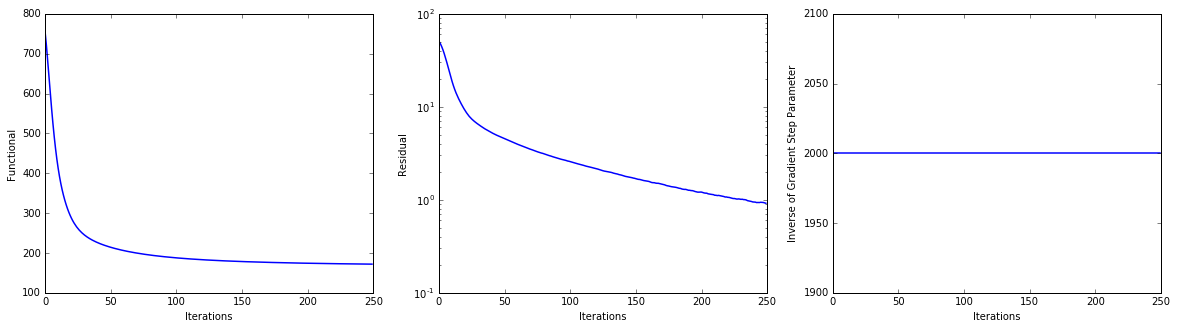

In [10]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, fgrf=fig, xlbl='Iterations', ylbl='Functional')
plot.subplot(1, 3, 2)
plot.plot(its.Rsdl, fgrf=fig, ptyp='semilogy', xlbl='Iterations',
        ylbl='Residual')
plot.subplot(1, 3, 3)
plot.plot(its.L, fgrf=fig, xlbl='Iterations',
        ylbl='Inverse of Gradient Step Parameter')
fig.show()